# How neural net works dumbed down

As I'm learning how neural networks and transformers work, this is my attempt to crystallize my understanding with the simplest possible examples of different concepts

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from PIL import Image, ImageSequence

%matplotlib inline

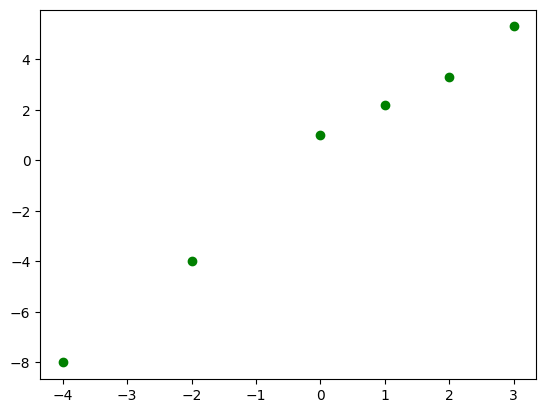

In [134]:
# Let's create some pretend training data, a simple line (almost)
x = [-4, -2, 0,1,2,3]
y = [-8,-4, 1, 2.2, 3.3, 5.3]
plt.plot(x, y, 'og')

In [ ]:
# We're going to create the simplest neural model a line
# It will only have two parameters: m and b 
# y = m*x + b

In [173]:
# Let's initialize m and b to random values far from the real values
# m = random.random()
# b = random.random()
m = -3
b = 20
print(f'{m=}')
print(f'{b=}')

m=-3
b=20


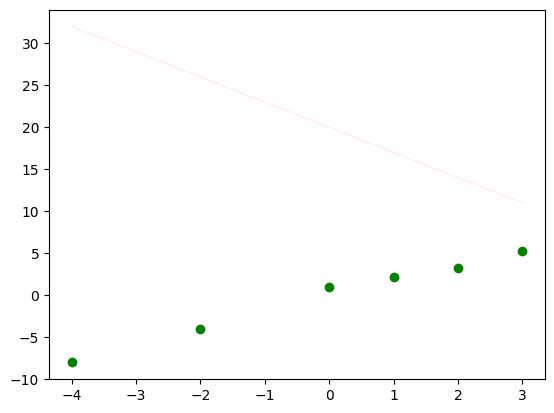

In [174]:
# Now let's initialize some variables to track our progress with every training pass (forward and back propogation)
losses = []
passes = 0
frames = []

# And let's setup a fig so we can plot the gradient descent 
fig, ax = plt.subplots()
ax.plot(x, y, 'og')

# Calculate y with our initalized m and b params
y_pred = [xi * m + b for xi in x]

# Plot it
ax.plot(x, y_pred, 'r', alpha = 0.05)

# Add it to the frames array so we can make a GIF
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
frames.append(Image.fromarray(image))

In [175]:
# Training loop is extremely simple

for _ in range(50):
    passes +=1

    # Iterate through the training data
    # We could randomly select but we are keeping it simple
    for i in range(len(x)):

        # Forward pass to calculate output
        # This is just y = mx + b for the current iput data
        out = m * x[i] + b
        
        # Calcualte the loss and keep track of it 
        loss = out - y[i]
        losses.append(loss)
        
        # Now the magic: backward propogation 

        # First we pick a step size 
        # There is a whole art form to picking this right
        # Basically it's how far we want to nudge our parameters each pass
        # Too large moves them faster but we might skip PAST the optimal value
        # Too small takes forever to train
        step_size = 0.01

        # Next we calcualte the gradient of each parameter
        # Which is the derivative of how the loss changes compared to how the param changes
        # In other words, which direciton do we need to move the parameter to minimize the loss
        # We multiply the parameter gradient by the loss due to the chain rule

        # Let's start with the gradient for parameter b
        # It's super simple, it's just 1 since it's a constant
        b_grad = 1 * loss # dy/db = 1
        # b_grad_calc = ((m*x + b+h) -  (m*x + b)) / h 
                    # =  (m*x - m*x +b-b +h) / h
                    # =   h / h = 1

        # The gradient of m is also straightforward, it's just x
        m_grad = x[i] * loss # dy/dm = x
        # m_grad_calc = (((m+h)x + b) - (mx + b)) / h
                    # = (mx +hx +b -mx - b ) / h
                    # = hx / x = x
        
        # Now we do our backward propogation step
        m -= m_grad * step_size
        b -= b_grad * step_size

    # Print out variables for debugging        
    # print(f'{loss=}')
    # print(f'{m=}')
    # print(f'{b=}')

    # At the end of this first set of passes we'll calculate new predictions and plot them
    y_pred = [xi * m + b for xi in x]
    ax.plot(x, y_pred, 'r', alpha = 1 - np.exp(-0.05 * passes))

    # We'll also add to our GIF
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(image))

In [176]:
# Create the GIF
frames[0].save('sgd_line4.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)

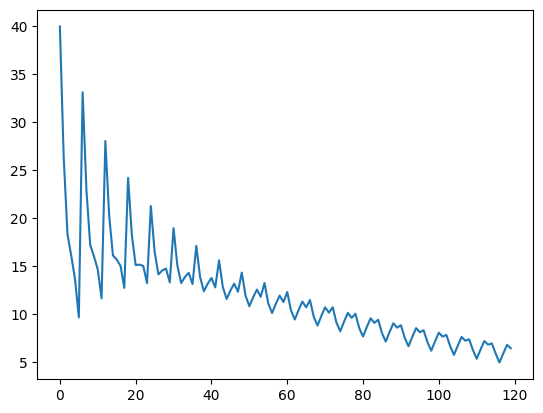

In [177]:
# Plot how the losses changed over time
plt.plot(losses)